<a href="https://colab.research.google.com/github/doruktopcu/GlobalAI-Hub-Python-Bootcamp-2022/blob/main/GlobalAiHubProject2_MoviesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0) Libraries & Data 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#First we uploaded our dataset to colab.
#We will save it as a DataFrame with pandas.
movies_df = pd.read_csv('NetflixOriginals.csv', sep=',', encoding='latin-1')

In [10]:
#movies_df is ready to analyse.
movies_df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,1922,Horror/Crime drama,20/10/2017,102,6.3,English
1,44764,Drama,10/10/2018,144,6.8,English
2,44788,Comedy-drama,29/03/2019,124,5.8,Marathi
3,#REALITYHIGH,Comedy,09/08/2017,99,5.2,English
4,13th,Documentary,10/07/2016,100,8.2,English
...,...,...,...,...,...,...
579,XOXO,Drama,26/08/2016,92,5.3,English
580,Yeh Ballet,Drama,21/02/2020,117,7.6,Hindi
581,Yes Day,Comedy,03/12/2021,86,5.7,English
582,You've Got This,Romantic comedy,10/02/2020,111,5.8,Spanish


In [11]:
movies_df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

No null values in the dataset.

In [12]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [13]:
#Converting Premiere column to date type.
movies_df['Premiere'] = pd.to_datetime(movies_df.Premiere)

In [14]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    584 non-null    datetime64[ns]
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 27.5+ KB


Premiere column is now a datetime64[ns] type

In [15]:
movies_df['Year'] = movies_df['Premiere'].dt.year

In [16]:
movies_df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
0,1922,Horror/Crime drama,2017-10-20,102,6.3,English,2017
1,44764,Drama,2018-10-10,144,6.8,English,2018
2,44788,Comedy-drama,2019-03-29,124,5.8,Marathi,2019
3,#REALITYHIGH,Comedy,2017-09-08,99,5.2,English,2017
4,13th,Documentary,2016-10-07,100,8.2,English,2016


We now have a year section which will make our job easier in answering some questions about the data set.

## 1) Genre Analysis

In [17]:
#We will find how many genres in the dataset.
genre_list_df = pd.DataFrame(movies_df.groupby('Genre').Genre.count())

In [18]:
genre_list_df

,Genre
Genre,
Action,7
Action comedy,5
Action thriller,1
Action-adventure,1
Action-thriller,3
...,...
War,2
War drama,2
War-Comedy,1


In genre_list_df we can see how many genres there are (115) and how many movies that belong to that genre.

In [19]:
genre_list_df = genre_list_df.rename(columns = {'Genre' : 'Count' })

In [20]:
genre_list_df = genre_list_df.sort_values(by = 'Count', ascending = False)

In [21]:
genre_list_df.head(10)

,Count
Genre,
Documentary,159
Drama,77
Comedy,49
Romantic comedy,39
Thriller,33
Comedy-drama,14
Crime drama,11
Biopic,9
Horror,9


In this dataset most movie produced top 10 genre can be seen. Documentary genre dominated the list.

In [22]:
genre_list_df.tail(10)

,Count
Genre,
Comedy horror,1
Drama-Comedy,1
Drama / Short,1
Dance comedy,1
Crime thriller,1
Coming-of-age comedy-drama,1
Comedy/Horror,1
Comedy/Fantasy/Family,1
Comedy mystery,1


The last 10 genres can be seen in this table. But a question arises; can these genres be merged into a more generalised genre? Some of these genres seem utterly specific.

## 2) Language Analysis

In [23]:
movies_language_df = pd.DataFrame(movies_df.groupby('Language').Language.count())

In [24]:
movies_language_df = movies_language_df.rename(columns = {'Language' : 'Count' })

In [25]:
#We will sort the the list in descending order.
movies_language_df = movies_language_df.sort_values(by = 'Count', ascending = False) 

In [26]:
#Top 10 most used languages in movies in this dataset.
movies_language_df.head(10)

,Count
Language,
English,401
Hindi,33
Spanish,31
French,20
Italian,14
Portuguese,12
Indonesian,9
Korean,6
Japanese,6


It is clear to say English is dominating the industry.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


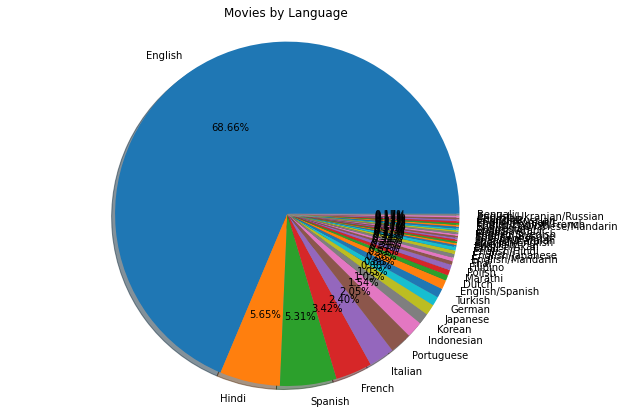

In [118]:
#We can create a piechart to see which language has more percentage.
plt.figure(figsize = [10, 7])
plt.title('Movies by Language')
plt.pie(movies_language_df, labels = movies_language_df.index, shadow=True, autopct='%1.2f%%')
plt.axis('equal')
plt.show()


## 3) Runtime Analysis

In [28]:
#We select the movies that has more runtime than 120 minutes and save it as a dataframe.
long_runtime_movies = movies_df[(movies_df.Runtime > 120)]

In [52]:
long_runtime_movies.describe()

,Runtime,IMDB Score,Year
count,68.000000,68.000000,68.000000
mean,133.382353,6.592647,2019.235294
std,13.393058,0.997507,1.271004
min,121.000000,3.500000,2015.000000
25%,124.000000,6.075000,2018.000000
50%,131.000000,6.700000,2019.000000
75%,139.000000,7.200000,2020.000000
max,209.000000,8.500000,2021.000000


## 4) IMDB Score Anaylsis

In [30]:
movies_df['IMDB Score'].describe()

count    584.000000
mean       6.271747
std        0.979256
min        2.500000
25%        5.700000
50%        6.350000
75%        7.000000
max        9.000000
Name: IMDB Score, dtype: float64

In [31]:
#Top 10 by IMDB scores.
top_ten_by_imdb = movies_df.sort_values(by = 'IMDB Score', ascending = False).head(10)

In [32]:
top_ten_by_imdb

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
121,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English,2020
145,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020
412,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018
67,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English,2020
577,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015
427,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018
114,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English,2017
118,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English,2019
523,The Three Deaths of Marisela Escobedo,Documentary,2020-10-14,109,8.2,Spanish,2020
383,Seaspiracy,Documentary,2021-03-24,89,8.2,English,2021


In [64]:
#IMDB scores of Documentaries that has premiered between 2019 January to 2020 June.
#Here we create a mask which will cover our conditions.
start_date = '2019-01-01'
end_date = '2020-06-30'
mask = (movies_df['Premiere'] > start_date) & (movies_df['Premiere'] <= end_date) & (movies_df['Genre'] == 'Documentary') #We only want the documentaries between these dates.
date_strict_doc_df = movies_df.loc[mask] #We apply the mask to the main dataframe and keep it as a seperate dataframe.


In [65]:
date_strict_doc_df.head(20)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
10,A 3 Minute Hug,Documentary,2019-10-28,28,6.5,English/Spanish,2019
18,A Life of Speed: The Juan Manuel Fangio Story,Documentary,2020-03-20,92,6.8,Spanish,2020
20,A Secret Love,Documentary,2020-04-29,82,7.9,English,2020
21,A Tale of Two Kitchens,Documentary,2019-05-22,30,6.3,English/Spanish,2019
25,After Maria,Documentary,2019-05-24,37,4.6,English/Spanish,2019
26,After the Raid,Documentary,2019-12-19,25,4.3,Spanish,2019
34,All in My Family,Documentary,2019-05-03,39,6.8,English/Mandarin,2019
41,American Factory,Documentary,2019-08-21,110,7.4,English,2019
49,Antoine Griezmann: The Making of a Legend,Documentary,2019-03-21,60,6.5,French,2019
55,Athlete A,Documentary,2020-06-24,104,7.6,English,2020


In [74]:
#Top 10 movies by IMDB in different genres.
top_movies_by_genre = pd.DataFrame(movies_df.groupby(['Genre'])['IMDB Score'].max().nlargest(10))

In [75]:
top_movies_by_genre 


,IMDB Score
Genre,
Documentary,9.0
One-man show,8.5
Concert Film,8.4
Animation/Christmas/Comedy/Adventure,8.2
Drama,7.9
Animation / Short,7.8
Crime drama,7.8
Making-of,7.7
Musical / Short,7.7


In [36]:
#Movies that has the highest IMDB scores in English. 
top_movies_by_genre = pd.DataFrame(movies_df.filter(like = 'English'))


## 5) Correlation Between Rt and IMDB

In [123]:
#Correlation between runtime and IMDB score.
movies_df.corr()

,Runtime,IMDB Score,Year
Runtime,1.000000,-0.040896,0.069262
IMDB Score,-0.040896,1.000000,-0.141347
Year,0.069262,-0.141347,1.000000


In [127]:
runtime_corr = pd.DataFrame([movies_df.Title, movies_df['IMDB Score'], movies_df['Runtime']])

In [128]:
runtime_corr

,0,1,2,3,4,5,6,7,8,9,...,574,575,576,577,578,579,580,581,582,583
Title,1922,44764,44788,#REALITYHIGH,13th,13th: A Conversation with Oprah Winfrey & Ava ...,5 Star Christmas,6 Balloons,6 Underground,7 años,...,Why Did You Kill Me?,Win It All,Wine Country,Winter on Fire: Ukraine's Fight for Freedom,Work It,XOXO,Yeh Ballet,Yes Day,You've Got This,Zion
IMDB Score,6.3,6.8,5.8,5.2,8.2,7.1,4.6,5.9,6.1,6.8,...,5.6,6.2,5.5,8.4,6.1,5.3,7.6,5.7,5.8,7.2
Runtime,102,144,124,99,100,36,95,75,128,76,...,83,88,103,91,93,92,117,86,111,11


In [143]:
runtime_corr = runtime_corr.transpose()

In [144]:
runtime_corr.head()

,Title,IMDB Score,Runtime
0,1922,6.3,102
1,44764,6.8,144
2,44788,5.8,124
3,#REALITYHIGH,5.2,99
4,13th,8.2,100


In [153]:
runtime_corr = runtime_corr.astype({'IMDB Score' : float} , errors = 'raise')

In [147]:
runtime_corr = runtime_corr.astype({"Runtime": int}, errors = 'raise')

In [157]:
runtime_corr = runtime_corr.sort_values(by = 'Runtime', ascending = True)

In [158]:
runtime_corr.dtypes

Title          object
IMDB Score    float64
Runtime         int64
dtype: object

In [159]:
runtime_corr.corr()

,IMDB Score,Runtime
IMDB Score,1.000000,-0.040896
Runtime,-0.040896,1.000000


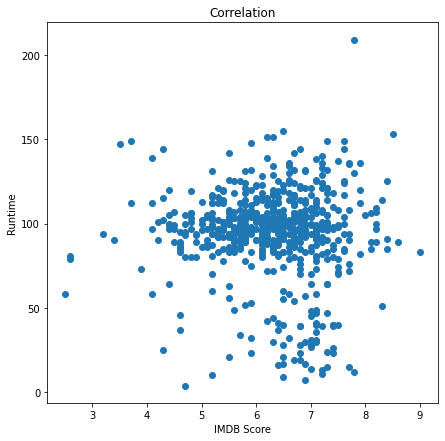

In [163]:
plt.figure(figsize = [7,7])
plt.scatter(runtime_corr['IMDB Score'], runtime_corr['Runtime'])
plt.title('Correlation')
plt.xlabel('IMDB Score')
plt.ylabel('Runtime')
plt.show()

## 6) Year analysis

In [38]:
year_movies_df = pd.DataFrame(movies_df.Year.value_counts())

In [39]:
year_movies_df.rename(columns = {'Year' : 'Count'}, inplace = True)

In [40]:
year_movies_df

,Count
2020,183
2019,125
2018,99
2021,71
2017,66
2016,30
2015,9
2014,1


## TASKS

In [77]:
#Avg. runtime of Hindi movies.
Language = 'Hindi'
mask = (movies_df['Language'] == Language)
hindi_movies_df = movies_df.loc[mask]
hindi_movies_df.describe()

,Runtime,IMDB Score,Year
count,33.000000,33.000000,33.000000
mean,115.787879,5.981818,2019.727273
std,16.999554,1.118999,0.910794
min,90.000000,3.400000,2018.000000
25%,104.000000,5.400000,2019.000000
50%,114.000000,6.100000,2020.000000
75%,120.000000,6.800000,2020.000000
max,149.000000,7.600000,2021.000000


In [83]:
#How many categories does Genre have.
categories_genre = movies_df['Genre'].unique()
print(categories_genre)
print('\nThis dataset contains', len(categories_genre), 'different genres.' )

['Horror/Crime drama' 'Drama' 'Comedy-drama' 'Comedy' 'Documentary'
 'Aftershow / Interview' 'Action' 'Comedy/Fantasy/Family'
 'Romantic comedy' 'Thriller' 'Biographical/Comedy' 'Comedy / Musical'
 'Christian musical' 'Anime/Fantasy' 'Stop Motion' 'Action comedy'
 'Romance' 'Anime/Science fiction' 'Sports-drama' 'Animation'
 'Musical / Short' 'Horror-thriller' 'Concert Film'
 'Animated musical comedy' 'Zombie/Heist' 'Science fiction/Thriller'
 'Hidden-camera prank comedy' 'Biopic' 'War drama' 'Musical' 'Family film'
 'Psychological thriller' 'Black comedy' 'Urban fantasy' 'Horror'
 'Psychological horror' 'Animation / Short' 'Drama/Horror'
 'Romantic teen drama' 'Romantic drama' 'Heist' 'Musical comedy' 'Family'
 'Horror thriller' 'Mentalism special' 'Christmas musical'
 'Teen comedy-drama' 'Mystery' 'Dark comedy' 'Crime drama'
 'Animation/Superhero' 'Family/Comedy-drama' 'Mockumentary'
 'Supernatural drama' 'Action/Comedy' 'Horror anthology'
 'Romantic comedy/Holiday' 'Adventure-romanc

In [88]:
#Most number of movies released by years.
movies_by_years = pd.DataFrame(movies_df.groupby('Year').Year.count())

In [106]:
movies_by_years.rename(columns = {'Year': 'Count'}, inplace = True)
movies_by_years

,Count
Year,
2014,1
2015,9
2016,30
2017,66
2018,99
2019,125
2020,183
2021,71


Text(0, 0.5, 'Number of Movies Released')

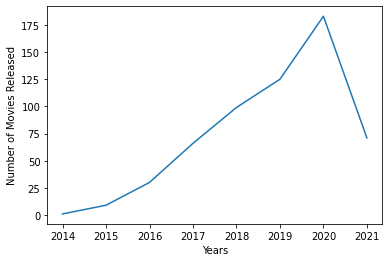

In [105]:
#Number of movies as a line graph which has been released in each year in this dataset. 
plt.figure()
plt.plot(movies_by_years)
plt.xlabel('Years')
plt.ylabel('Number of Movies Released')

A decline in 2020 and 2021 can be seen, which is most likely the result of Covid19 Pandemic lock downs.

In [168]:
#Movies in which languages has the lowest IMDB scores.
avg_imdb_by_language = pd.DataFrame(movies_df.groupby('Language')['IMDB Score'].mean())
avg_imdb_by_language = avg_imdb_by_language.sort_values(by = 'IMDB Score', ascending = False)

In [170]:
avg_imdb_by_language.tail()

,IMDB Score
Language,
Polish,5.166667
Norwegian,5.100000
Filipino,5.100000
English/Japanese,4.400000
Malay,4.200000


In [171]:
#Which year has to most runtime sum.
runtime_sum_df = pd.DataFrame(movies_df.groupby('Year')['Runtime'].sum())

In [173]:
runtime_sum_df = runtime_sum_df.sort_values(by = 'Runtime', ascending = False)

In [174]:
runtime_sum_df.head()

,Runtime
Year,
2020,17384
2019,10856
2018,9405
2021,7214
2017,6129


In [46]:
#Are there outliers in the data set?

In [192]:
#Which languages are mostly used by genre?
language_by_genre = pd.DataFrame(movies_df.groupby(['Genre', 'Language'])['Language'].count())

In [193]:
language_by_genre

Language
Genre         Language              
Action        English              4
              French               2
              Hindi                1
Action comedy English              4
              Malay                1
...                              ...
War drama     English/Akan         1
War-Comedy    English              1
Western       English              2
              Portuguese           1
Zombie/Heist  English              1

[204 rows x 1 columns]